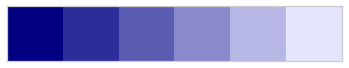

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style({'axes.grid' : False})
sns.palplot(sns.light_palette("navy", reverse=True))

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
df_raw = pd.read_csv('diabetic_data.csv')
df_raw.replace('?',np.nan, inplace=True) #replace ? with Nans
df_raw.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [104]:
df_raw.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
df_raw.shape

(101766, 50)

In [4]:
df_raw.sort_values(by=['patient_nbr','encounter_id'], inplace=True)
df_raw.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4267,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,NaN,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
4780,26264286,135,Caucasian,Female,[50-60),NaN,1,1,7,3,NaN,Surgery-Cardiovascular/Thoracic,31,1,14,0,0,1,998,41,250,5,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
5827,29758806,378,Caucasian,Female,[50-60),NaN,3,1,1,2,NaN,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
67608,189899286,729,Caucasian,Female,[80-90),NaN,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
17494,64331490,774,Caucasian,Female,[80-90),NaN,1,1,7,3,NaN,InternalMedicine,46,0,20,0,0,0,274,427,416,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
2270,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,NaN,InternalMedicine,49,0,5,0,0,0,590,220,250,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
1164,8380170,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,43,2,13,0,0,1,282,250.01,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
14180,55533660,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,10,NaN,Hematology/Oncology,54,2,19,0,0,1,282,276,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,8,NaN,NaN,30,1,16,0,0,1,282,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [5]:
#get only one patient/first encounter for independent observations

df_onePatient = df_raw.groupby(['patient_nbr']).agg({'encounter_id':'min'})
df_onePatient.shape

(71518, 1)

In [6]:
#merge this last dataset with the previous one
onePatient = pd.merge(df_raw, df_onePatient, on='encounter_id')

onePatient.sort_values(by=['encounter_id'], inplace=True) #encounter_id is my best indication of time
onePatient.set_index('encounter_id', inplace=True)

#flatten column names to same level as index
onePatient.columns.name = onePatient.index.name
onePatient.index.name = None

In [7]:
onePatient.shape #(71518, 49)

(71518, 49)

In [8]:
onePatient.head()

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
28236,89869032,AfricanAmerican,Female,[40-50),NaN,1,1,7,9,NaN,NaN,47,2,17,0,0,0,250.7,403,996,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [9]:
df = onePatient.drop(columns=['weight','payer_code','medical_specialty','number_outpatient',
                                    'number_emergency','number_inpatient','admission_type_id',
                                    'discharge_disposition_id','admission_source_id','diag_2','diag_3','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'])
df.isnull().sum()

encounter_id
patient_nbr              0
race                  1948
gender                   0
age                      0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
diag_1                  11
number_diagnoses         0
max_glu_serum            0
A1Cresult                0
change                   0
diabetesMed              0
readmitted               0
dtype: int64

In [10]:
df.gender.value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

In [11]:
df.drop(df.loc[df['gender']=='Unknown/Invalid'].index, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

encounter_id
patient_nbr           0
race                  0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
diag_1                0
number_diagnoses      0
max_glu_serum         0
A1Cresult             0
change                0
diabetesMed           0
readmitted            0
dtype: int64

In [14]:
df.shape #(69559, 15)
df.head()

encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
12522,48330783,Caucasian,Female,[80-90),13,68,2,28,398,8,None,None,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),12,33,3,18,434,8,None,None,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,51,0,8,197,5,None,None,Ch,Yes,NO
28236,89869032,AfricanAmerican,Female,[40-50),9,47,2,17,250.7,9,None,None,No,Yes,>30
35754,82637451,Caucasian,Male,[50-60),3,31,6,16,414,9,None,None,No,Yes,>30


In [15]:
diag_cols = ['diag_1']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)

# diagnosis grouping (from kaggle)
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Urogenital'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)

In [16]:
df.head()

encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
12522,48330783,Caucasian,Female,[80-90),13,68,2,28,Circulatory,8,None,None,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),12,33,3,18,Circulatory,8,None,None,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,51,0,8,Neoplasms,5,None,None,Ch,Yes,NO
28236,89869032,AfricanAmerican,Female,[40-50),9,47,2,17,Diabetes,9,None,None,No,Yes,>30
35754,82637451,Caucasian,Male,[50-60),3,31,6,16,Circulatory,9,None,None,No,Yes,>30


In [17]:
#some conversions for plotting purposes

#Glucose serum test: done / not-done
condition1 = df['max_glu_serum']!='None'
df['max_glu_serum'] = np.where(condition1,'Done','Not done')

#A1c test result: done / not-done
condition2 = df['A1Cresult']!='None'
df['A1Cresult'] = np.where(condition2,'Done','Not done')

#If there was a change of medication: Yes / No
#change_dict = {'Ch':'Yes'}
df['change'] = df['change'].replace('Ch','Yes')

#Readmissions in less than 30 days : Yes / No (new column)
condition3 = df['readmitted']!='<30'
df['readmitted<30'] = np.where(condition3,'No','Yes')

#Readmission YES/NO (new column)
condition4 = df['readmitted']!='NO'
df['readmitted(y/n)'] = np.where(condition4,'Yes','No')

In [18]:
df['readmitted(y/n)'].value_counts()

No     41605
Yes    27954
Name: readmitted(y/n), dtype: int64

In [19]:
df.head()

encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,readmitted<30,readmitted(y/n)
12522,48330783,Caucasian,Female,[80-90),13,68,2,28,Circulatory,8,Not done,Not done,Yes,Yes,NO,No,No
15738,63555939,Caucasian,Female,[90-100),12,33,3,18,Circulatory,8,Not done,Not done,Yes,Yes,NO,No,No
16680,42519267,Caucasian,Male,[40-50),1,51,0,8,Neoplasms,5,Not done,Not done,Yes,Yes,NO,No,No
28236,89869032,AfricanAmerican,Female,[40-50),9,47,2,17,Diabetes,9,Not done,Not done,No,Yes,>30,No,Yes
35754,82637451,Caucasian,Male,[50-60),3,31,6,16,Circulatory,9,Not done,Not done,No,Yes,>30,No,Yes


# EDA/Plotting

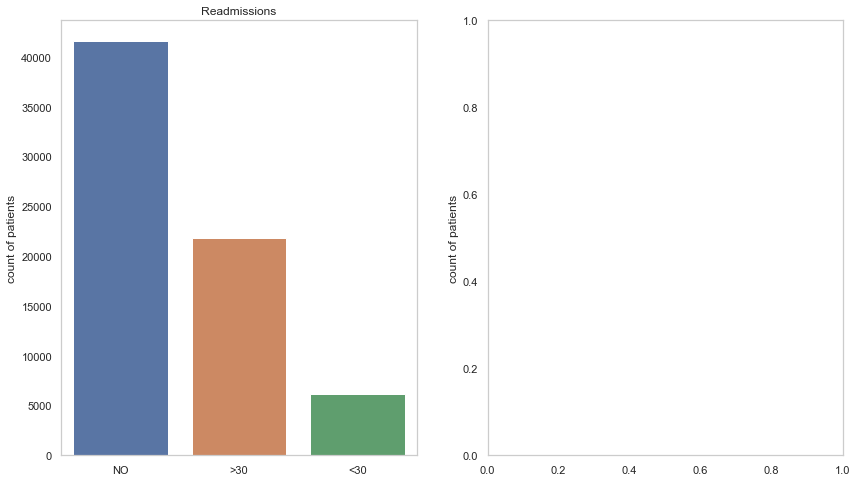

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
font = {'size':14}
plt.rc('font', **font)

sns.countplot(x='readmitted', data=df, ax=axes[0]).set_title('Readmissions')
sns.countplot(x='readmitted<30', data=df, ax=axes[1]).set_title('Readmissions in less than 30days')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('count of patients')

Text(0, 0.5, 'count of patients')

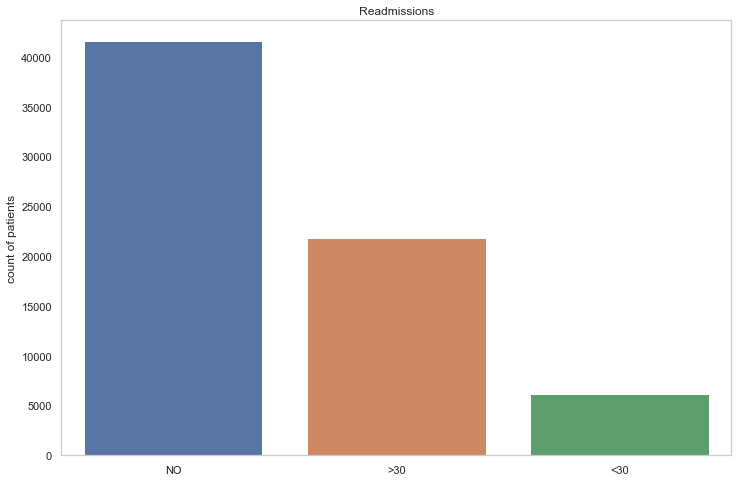

In [76]:
fig, axes = plt.subplots( figsize=(12, 8))
font = {'size':14}
plt.rc('font', **font)

sns.countplot(x='readmitted', data=df).set_title('Readmissions')
axes.set_xlabel('')
axes.set_ylabel('count of patients')

In [21]:
df.shape

(69559, 17)

In [22]:
df['readmitted<30'].value_counts()

No     63409
Yes     6150
Name: readmitted<30, dtype: int64

In [23]:
perc = (6150/69559)*100
print(f"Percentage of patients being readmitted in hospital {round(perc, 1)}%")

Percentage of patients being readmitted in hospital 8.8%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

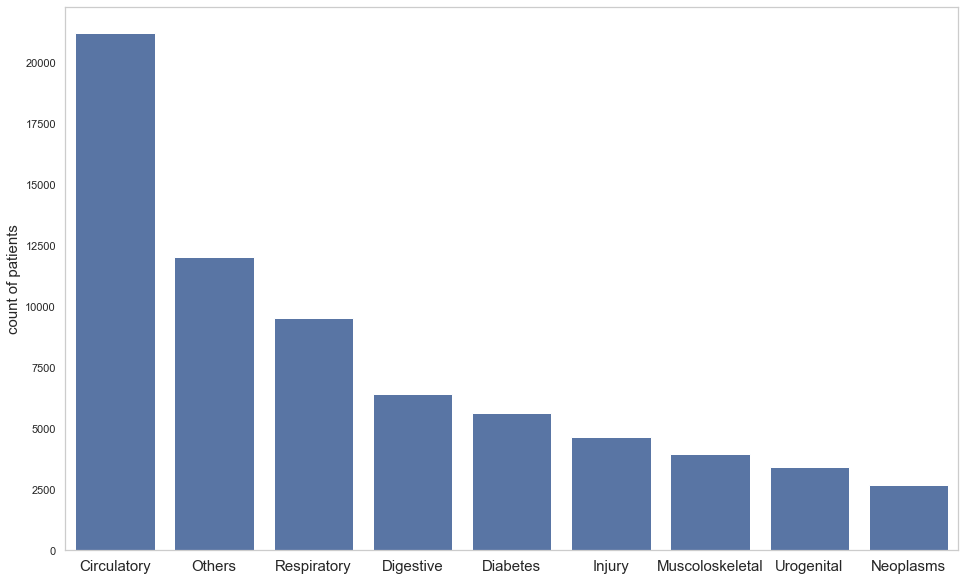

In [69]:
fig, axes = plt.subplots(figsize=(16, 10))
font = {'size':12}
plt.rc('font', **font)

sns.countplot(x='diag_1', data=df, order = df['diag_1'].value_counts().index, color = "b").set_title('Primary diagnosis')
axes.set_xlabel('')
axes.set_title('')
axes.set_ylabel('count of patients', fontsize=15)
plt.xticks(fontsize=15)

Text(0, 0.5, 'count of patients')

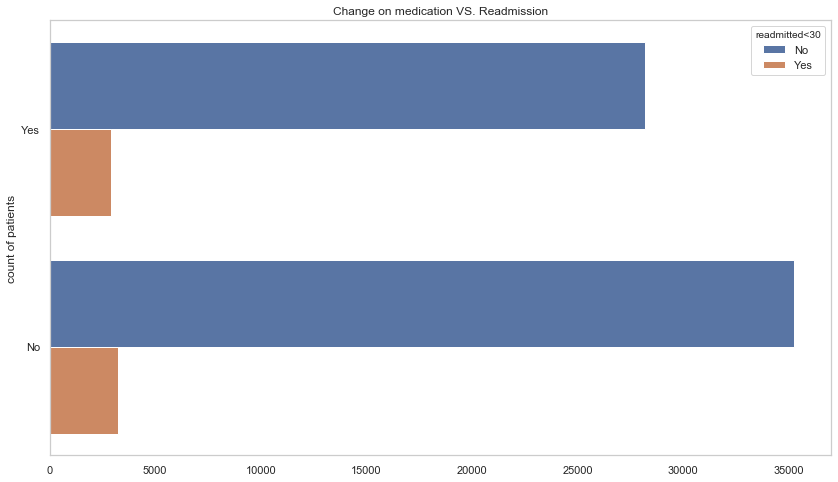

In [70]:
fig, axes = plt.subplots(figsize=(14, 8))
font = {'size':14}
plt.rc('font', **font)

sns.countplot(y= df['change'], hue = df['readmitted<30']).set_title('Change on medication VS. Readmission')#, order = df['diag_1'].value_counts().index)
axes.set_xlabel('')
axes.set_ylabel('count of patients')


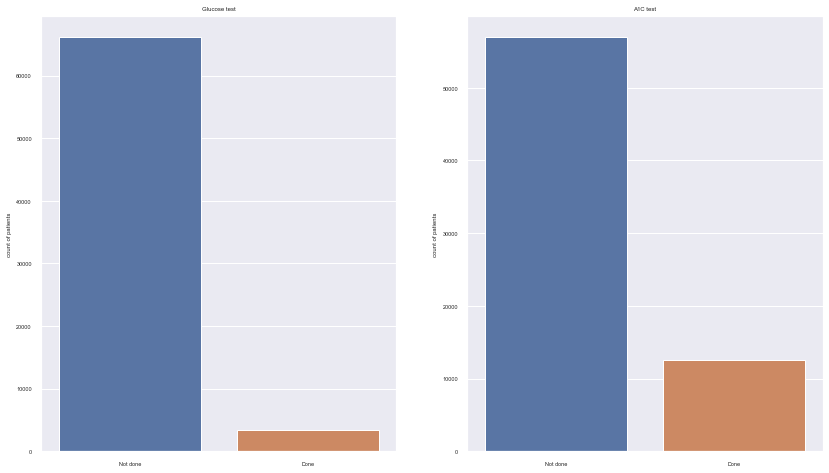

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
font = {'size':30}
plt.rc('font', **font)

sns.set(font_scale = 0.5)
#sns.set(fontsize = 16)

sns.countplot(x='max_glu_serum', data=df, ax=axes[0]).set_title('Glucose test')
sns.countplot(x='A1Cresult', data=df, ax=axes[1]).set_title('A1C test')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('count of patients')

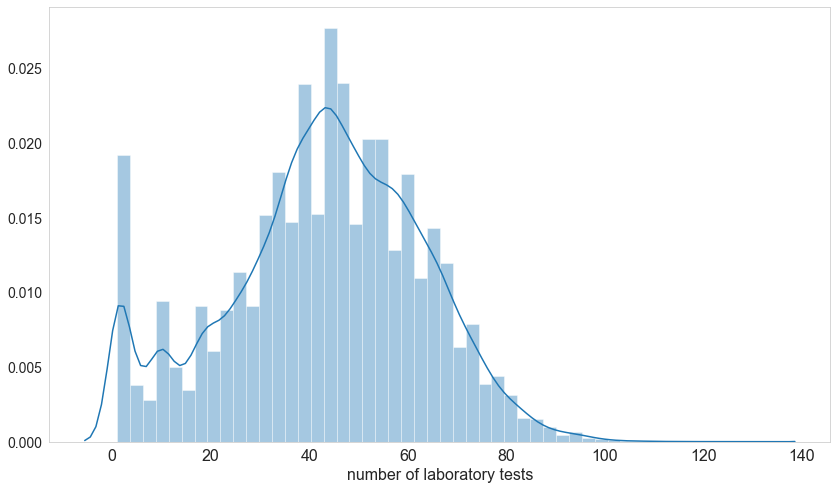

In [27]:
fig, axes = plt.subplots(figsize=(14, 8))
font = {'size':14}
plt.rc('font', **font)

sns.distplot(df.num_lab_procedures)


plt.xlabel('number of laboratory tests', fontsize=16)
#plt.ylabel('Feature importance', fontsize=20)
plt.xticks(fontsize=16)
#plt.yticks(fontsize=15)
plt.show()

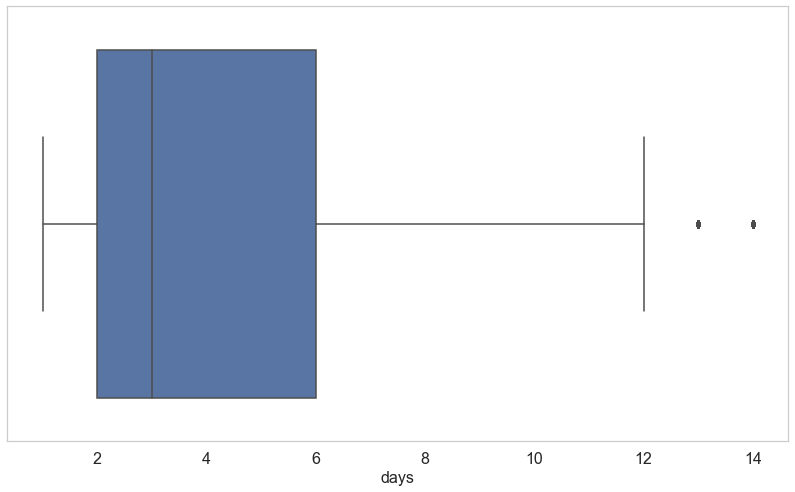

In [108]:
fig, axes = plt.subplots(figsize=(14, 8))
font = {'size':14}
plt.rc('font', **font)

sns.boxplot(df.time_in_hospital)


plt.xlabel('days', fontsize=16)
#plt.ylabel('Feature importance', fontsize=20)
plt.xticks(fontsize=16)
#plt.yticks(fontsize=15)
plt.show()

In [28]:
df_yes = df.loc[df['readmitted<30']=='Yes']
df_no = df.loc[df['readmitted<30']=='No']

"\nfig = plt.figure(figsize=(13,7),)\nax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')\nax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')\nax.set(xlabel='Time in Hospital', ylabel='Frequency')\nplt.title('Time in Hospital VS. Readmission')\n"

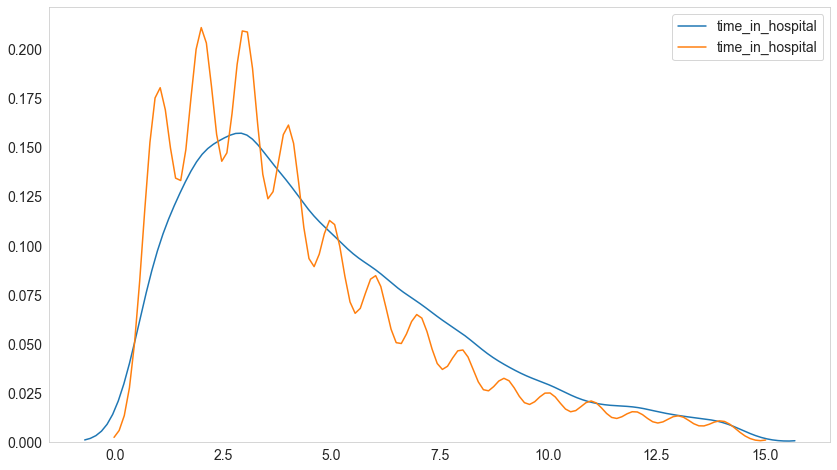

In [29]:
fig, axes = plt.subplots(figsize=(14, 8))
font = {'size':14}
plt.rc('font', **font)

sns.kdeplot(df_yes.time_in_hospital)
sns.kdeplot(df_no.time_in_hospital)

'''
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
'''

Text(0, 0.5, 'Changes in medication')

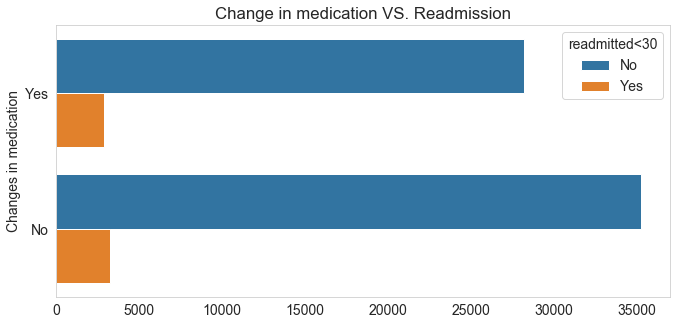

In [30]:
fig, axes = plt.subplots(figsize=(11, 5))
font = {'size':14}
plt.rc('font', **font)

sns.countplot(y= df['change'], hue = df['readmitted<30']).set_title('Change in medication VS. Readmission')
axes.set_xlabel('')
axes.set_ylabel('Changes in medication')


# Machine Learning

In [31]:
df.head()

encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,readmitted<30,readmitted(y/n)
12522,48330783,Caucasian,Female,[80-90),13,68,2,28,Circulatory,8,Not done,Not done,Yes,Yes,NO,No,No
15738,63555939,Caucasian,Female,[90-100),12,33,3,18,Circulatory,8,Not done,Not done,Yes,Yes,NO,No,No
16680,42519267,Caucasian,Male,[40-50),1,51,0,8,Neoplasms,5,Not done,Not done,Yes,Yes,NO,No,No
28236,89869032,AfricanAmerican,Female,[40-50),9,47,2,17,Diabetes,9,Not done,Not done,No,Yes,>30,No,Yes
35754,82637451,Caucasian,Male,[50-60),3,31,6,16,Circulatory,9,Not done,Not done,No,Yes,>30,No,Yes


In [32]:
dfML = df.drop(columns=['race','diag_1','patient_nbr','readmitted','readmitted(y/n)'])

In [33]:
dfML['readmitted<30'].value_counts()

No     63409
Yes     6150
Name: readmitted<30, dtype: int64

In [34]:
dfML.head()

encounter_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted<30
12522,Female,[80-90),13,68,2,28,8,Not done,Not done,Yes,Yes,No
15738,Female,[90-100),12,33,3,18,8,Not done,Not done,Yes,Yes,No
16680,Male,[40-50),1,51,0,8,5,Not done,Not done,Yes,Yes,No
28236,Female,[40-50),9,47,2,17,9,Not done,Not done,No,Yes,No
35754,Male,[50-60),3,31,6,16,9,Not done,Not done,No,Yes,No


In [35]:
#Convert categorical data to numerical

#gender
gender_dict = {'Female':0,'Male':1}
dfML['gender'] = dfML['gender'].replace(gender_dict)

#I decided to go with mid value from interval
age_dict = {'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,
            '[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95}
dfML['age'] = dfML['age'].replace(age_dict)

#Glucose serum test: 1 for test done / 0 for test not-done
glu_dict = {'Not done':0,'Done':1}
dfML['max_glu_serum'] = dfML['max_glu_serum'].replace(glu_dict)

#A1c test result: 1 for test taken / 0 for test not-taken
a1c_dict = {'Not done':0,'Done':1}
dfML['A1Cresult'] = dfML['A1Cresult'].replace(a1c_dict)

#If there was a change of medication: 1 for change / 0 for no change
change_dict = {'No':0,'Yes':1}
dfML['change'] = dfML['change'].replace(change_dict)

#If patient is taking diabetes-medication: 1 for yes / 0 for no
diabetesMed_dict = {'No':0,'Yes':1}
dfML['diabetesMed'] = dfML['diabetesMed'].replace(diabetesMed_dict)

#If patient was readmitted: 1 for Yes / 0 for No
readmit_dict = {'No':0,'Yes':1}
dfML['readmitted<30'] = dfML['readmitted<30'].replace(readmit_dict)

In [36]:
dfML['readmitted<30'].value_counts()

0    63409
1     6150
Name: readmitted<30, dtype: int64

In [37]:
dfML.dtypes

encounter_id
gender                int64
age                   int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_diagnoses      int64
max_glu_serum         int64
A1Cresult             int64
change                int64
diabetesMed           int64
readmitted<30         int64
dtype: object

In [38]:
dfML.describe()

encounter_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted<30
count,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000
mean,0.467474,65.647939,4.290746,43.047442,1.431404,15.701347,7.261993,0.048966,0.181141,0.446973,0.758105,0.088414
std,0.498945,15.981772,2.950252,19.982604,1.757571,8.300382,1.988478,0.215798,0.385138,0.497184,0.428234,0.283898
min,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,2.000000,31.000000,0.000000,10.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,65.000000,3.000000,44.000000,1.000000,14.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,75.000000,6.000000,57.000000,2.000000,20.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,95.000000,14.000000,132.000000,6.000000,81.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
cols = ['readmitted<30','gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed']

In [40]:
dfML = dfML[cols]
dfML.head()

encounter_id,readmitted<30,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
12522,0,0,85,13,68,2,28,8,0,0,1,1
15738,0,0,95,12,33,3,18,8,0,0,1,1
16680,0,1,45,1,51,0,8,5,0,0,1,1
28236,0,0,45,9,47,2,17,9,0,0,0,1
35754,0,1,55,3,31,6,16,9,0,0,0,1


In [41]:
dfML_corr = dfML.corr()
heatmap = dfML_corr.style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
heatmap

encounter_id,readmitted<30,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
encounter_id,,,,,,,,,,,,
readmitted<30,1,-0.0026,0.043,0.053,0.029,-0.00049,0.036,0.042,0.0082,-0.0074,0.016,0.029
gender,-0.0026,1,-0.053,-0.024,0.0051,0.066,-0.013,-0.0032,-0.0019,0.023,0.018,0.018
age,0.043,-0.053,1,0.13,0.028,-0.023,0.053,0.26,0.041,-0.12,-0.038,-0.027
time_in_hospital,0.053,-0.024,0.13,1,0.33,0.19,0.47,0.23,0.013,0.072,0.11,0.069
num_lab_procedures,0.029,0.0051,0.028,0.33,1,0.05,0.26,0.16,-0.13,0.27,0.074,0.043
num_procedures,-0.00049,0.066,-0.023,0.19,0.05,1,0.4,0.088,-0.083,-0.026,0.0065,-0.0059
num_medications,0.036,-0.013,0.053,0.47,0.26,0.4,1,0.26,-0.028,0.02,0.24,0.19
number_diagnoses,0.042,-0.0032,0.26,0.23,0.16,0.088,0.26,1,-0.073,-0.0097,0.045,0.021
max_glu_serum,0.0082,-0.0019,0.041,0.013,-0.13,-0.083,-0.028,-0.073,1,-0.065,-0.016,-0.024


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [43]:
#feature scaling

scaler = MinMaxScaler(feature_range=(0,1))
dfML[['age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses']] = scaler.fit_transform(dfML[['age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses']])

dfML.describe()

encounter_id,readmitted<30,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed
count,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000,69559.000000
mean,0.088414,0.467474,0.673866,0.253134,0.320973,0.238567,0.183767,0.417466,0.048966,0.181141,0.446973,0.758105
std,0.283898,0.498945,0.177575,0.226942,0.152539,0.292928,0.103755,0.132565,0.215798,0.385138,0.497184,0.428234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.555556,0.076923,0.229008,0.000000,0.112500,0.333333,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.666667,0.153846,0.328244,0.166667,0.162500,0.466667,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.777778,0.384615,0.427481,0.333333,0.237500,0.533333,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y = dfML['readmitted<30']
X = dfML.drop(['readmitted<30'], axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [46]:
#resampling
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [47]:
X.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted<30
60115668,0,0.444444,0.000000,0.007634,0.833333,0.2000,0.400000,0,0,1,1,0
271216428,1,0.666667,0.384615,0.389313,0.000000,0.3875,0.533333,0,0,1,1,0
152753220,0,1.000000,0.461538,0.290076,0.500000,0.1625,0.533333,0,0,0,0,0
247663044,0,0.777778,0.538462,0.564885,0.166667,0.2875,0.533333,0,1,1,1,0
107753928,1,0.444444,0.076923,0.374046,0.000000,0.0750,0.266667,0,1,0,1,0


In [48]:
X['readmitted<30'].value_counts()

0    50770
1     4877
Name: readmitted<30, dtype: int64

In [49]:
# separate minority and majority classes
X_0 = X.loc[X['readmitted<30']==0] #majority
X_1 = X.loc[X['readmitted<30']==1] #minority

In [50]:
len(X_1)

4877

In [51]:
# downsample majority
X_0_downsampled = resample(X_0,
                                replace = False, # sample without replacement
                                n_samples = len(X_1), # match minority n
                                random_state = 29) # reproducible results

# combine minority and downsampled majority
X_downsampled = pd.concat([X_1, X_0_downsampled])

# check new class counts
X_downsampled['readmitted<30'].value_counts()

1    4877
0    4877
Name: readmitted<30, dtype: int64

In [52]:
y_train_downsampled = X_downsampled['readmitted<30']
X_train_downsampled =X_downsampled.drop(['readmitted<30'], axis=1)

In [53]:
X_train_downsampled.shape

(9754, 11)

In [54]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train_downsampled,y_train_downsampled)
acc = lr.score(X_test,y_test)*100

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

Logistic Regression Test Accuracy 54.28%


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train_downsampled, y_train_downsampled)
acc = dtc.score(X_test, y_test)*100

print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 51.28%


In [56]:
# KNN Model

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train_downsampled, y_train_downsampled)
acc = knn.score(X_test, y_test)*100

print(f"8 neighbors KNN Score: {round(acc,2)}%")

8 neighbors KNN Score: 71.12%


In [57]:
# AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=9999, random_state=0)
clf.fit(X_train_downsampled, y_train_downsampled)
acc = clf.score(X_test, y_test)*100

print(f"AdaBoostClassifier Score: {round(acc,2)}%")

AdaBoostClassifier Score: 53.65%


In [58]:
'''
TP | FN
FP | TN
'''
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[9522, 3117],
       [ 901,  372]])

In [59]:
#cross validation

#cv_results = cross_val_score(knn, X, y, cv=5) 
#cv_results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01513391 0.08475375 0.10619658 0.32096768 0.09369357 0.2657404
 0.08907892 0.00379791 0.00781676 0.00996463 0.0028559 ]


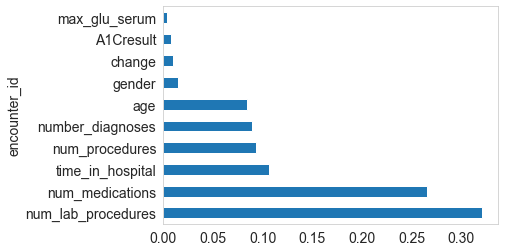

In [60]:
y = dfML['readmitted<30']
X = dfML.drop(['readmitted<30'], axis = 1)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [61]:
y = dfML['readmitted<30']
X = dfML.drop(['readmitted<30'], axis = 1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                 Specs      Score
2     time_in_hospital  40.455839
10         diabetesMed  14.431042
9               change   9.726096
1                  age   5.898687
6     number_diagnoses   5.281781
5      num_medications   5.149059
7        max_glu_serum   4.427164
3   num_lab_procedures   4.271654
8            A1Cresult   3.090083
0               gender   0.257205
4       num_procedures   0.006096


In [62]:
featureScores = featureScores.sort_values(by='Score', ascending=False)

In [64]:
featureScores

,Specs,Score
2,time_in_hospital,40.455839
10,diabetesMed,14.431042
9,change,9.726096
1,age,5.898687
6,number_diagnoses,5.281781
5,num_medications,5.149059
7,max_glu_serum,4.427164
3,num_lab_procedures,4.271654
8,A1Cresult,3.090083
0,gender,0.257205


In [65]:
change_dict = {'time_in_hospital':'Time in hospital',
               'diabetesMed':'Diabetes medication',
              'change':'Change of medication',
              'age':'Age',
              'number_diagnoses':'Number of diagnosis',
              'num_medications':'Number of medications',
              'max_glu_serum':'Glucose test done',
              'num_lab_procedures':'Number of lab procedures',
              'A1Cresult':'A1C test done',
              'gender':'Gender'}

featureScores['Specs'] = featureScores['Specs'].replace(change_dict)

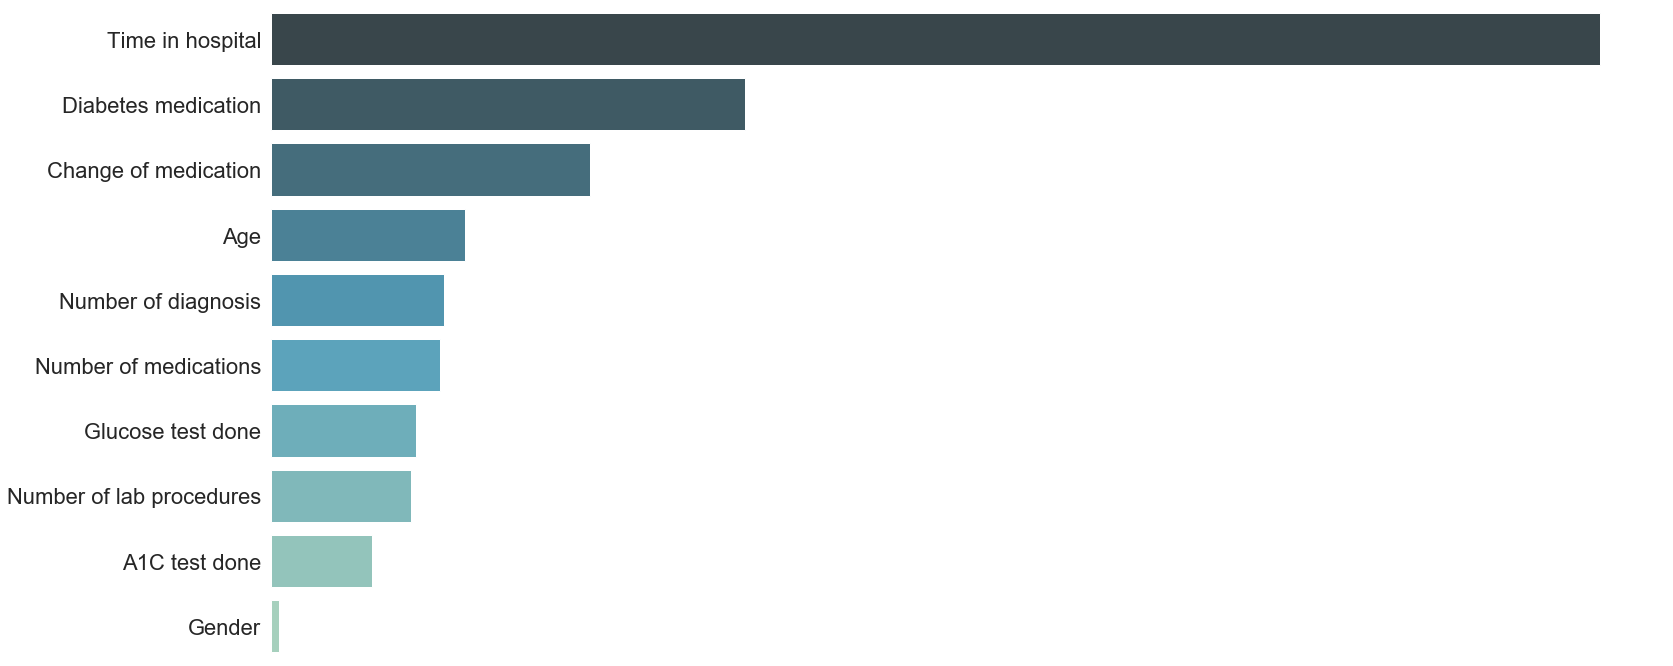

In [66]:
sns.set(rc={'figure.figsize':(25,12)})

featureScores_feat = featureScores [0:-1]
sns.barplot(y='Specs', x='Score', data=featureScores_feat, palette = "GnBu_d")#, orient = 'h')
#sns.barplot(data=featureScores_feat, palette = "GnBu_d")#, orient = 'h')

plt.box(False)
#plt.title('Feature importance', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=22)
plt.show()